<a href="https://colab.research.google.com/github/futurexskill/ai/blob/master/building_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building & Deploying a Machine Learning Classification model  

## Import the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Read the dataset

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/futurexskill/ai/master/storepurchasedata.csv')

## Sample records 

In [3]:
dataset.head(5)

,Age,Salary,Purchased
0,18,20000,0
1,19,22000,0
2,20,24000,0
3,21,28000,0
4,22,50000,1


## Get  dataset info

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Age          40 non-null int64
Salary       40 non-null int64
Purchased    40 non-null int64
dtypes: int64(3)
memory usage: 1.0 KB


## Get statistical info

In [5]:
dataset.describe()

,Age,Salary,Purchased
count,40.000000,40.000000,40.000000
mean,38.100000,49525.000000,0.550000
std,12.557151,19046.484971,0.503831
min,18.000000,20000.000000,0.000000
25%,27.750000,35000.000000,0.000000
50%,37.500000,48500.000000,1.000000
75%,47.250000,60000.000000,1.000000
max,60.000000,95000.000000,1.000000


## Feature selection

### Store the features (Age & Salary) in a NumPy array X 

In [6]:
X = dataset.iloc[:, :-1].values
X

array([[   18, 20000],
       [   19, 22000],
       [   20, 24000],
       [   21, 28000],
       [   22, 50000],
       [   23, 35000],
       [   24, 30000],
       [   25, 32000],
       [   26, 35000],
       [   27, 37000],
       [   28, 80000],
       [   29, 40000],
       [   30, 45000],
       [   31, 50000],
       [   32, 45000],
       [   33, 47000],
       [   34, 46000],
       [   35, 56000],
       [   36, 60000],
       [   37, 23000],
       [   38, 53000],
       [   39, 30000],
       [   40, 60000],
       [   41, 63000],
       [   42, 45000],
       [   43, 52000],
       [   44, 51000],
       [   45, 60000],
       [   46, 22000],
       [   47, 55000],
       [   48, 53000],
       [   50, 45000],
       [   52, 65000],
       [   54, 78000],
       [   55, 78000],
       [   56, 45000],
       [   57, 56000],
       [   58, 80000],
       [   59, 90000],
       [   60, 95000]])

## Store  the Dependent variaable in a NumPy Array

In [7]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Exploratory Data Analysis using MatplotLib

### Plot Purchased Vs Age

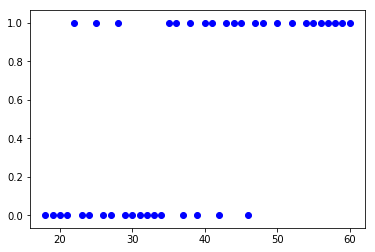

In [8]:
plt.scatter(X[:,0], y, color = 'blue')

### Plot Purchased Vs Salary

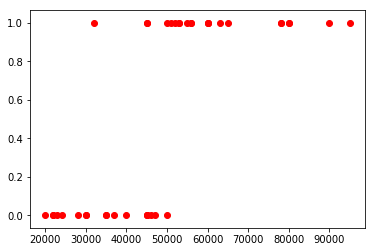

In [9]:
plt.scatter(X[:,1], y, color = 'red')


## Split the Training and Test Data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20,random_state=0)

### Print the training set features (Independent Variables - Age, Salary)

In [11]:
X_train

array([[   36, 60000],
       [   47, 55000],
       [   45, 60000],
       [   56, 45000],
       [   58, 80000],
       [   20, 24000],
       [   60, 95000],
       [   48, 53000],
       [   55, 78000],
       [   34, 46000],
       [   57, 56000],
       [   26, 35000],
       [   31, 50000],
       [   23, 35000],
       [   35, 56000],
       [   32, 45000],
       [   54, 78000],
       [   25, 32000],
       [   52, 65000],
       [   19, 22000],
       [   44, 51000],
       [   30, 45000],
       [   50, 45000],
       [   42, 45000],
       [   24, 30000],
       [   41, 63000],
       [   39, 30000],
       [   37, 23000],
       [   27, 37000],
       [   59, 90000],
       [   21, 28000],
       [   18, 20000]])

### Print the training set dependent variable - Purchased




In [12]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

### Print the test set features (Independent Variables) - Age & Salary

In [13]:
X_test

array([[   40, 60000],
       [   38, 53000],
       [   43, 52000],
       [   22, 50000],
       [   28, 80000],
       [   33, 47000],
       [   46, 22000],
       [   29, 40000]])

### Print the test set dependent variable - Purchased

In [14]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0])

## Feature Scaling

StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Print feature scaled training independent variables

In [16]:
X_train

array([[-0.22030803,  0.54818427],
       [ 0.61354601,  0.29247149],
       [ 0.46193618,  0.54818427],
       [ 1.29579021, -0.21895407],
       [ 1.44740004,  1.5710354 ],
       [-1.43318661, -1.29294775],
       [ 1.59900986,  2.33817374],
       [ 0.68935092,  0.19018638],
       [ 1.2199853 ,  1.46875029],
       [-0.37191785, -0.16781151],
       [ 1.37159512,  0.34361405],
       [-0.97835714, -0.73037963],
       [-0.59933258,  0.03675871],
       [-1.20577188, -0.73037963],
       [-0.29611294,  0.34361405],
       [-0.52352767, -0.21895407],
       [ 1.14418039,  1.46875029],
       [-1.05416206, -0.8838073 ],
       [ 0.99257056,  0.80389706],
       [-1.50899153, -1.39523286],
       [ 0.38613127,  0.08790127],
       [-0.6751375 , -0.21895407],
       [ 0.84096074, -0.21895407],
       [ 0.23452145, -0.21895407],
       [-1.12996697, -0.98609241],
       [ 0.15871653,  0.70161194],
       [ 0.00710671, -0.98609241],
       [-0.14450311, -1.34409031],
       [-0.90255223,

### Print feature scaled training independent variables

In [17]:
X_test

array([[ 0.08291162,  0.54818427],
       [-0.0686982 ,  0.19018638],
       [ 0.31032636,  0.13904382],
       [-1.28157679,  0.03675871],
       [-0.82674732,  1.5710354 ],
       [-0.44772276, -0.11666896],
       [ 0.53774109, -1.39523286],
       [-0.75094241, -0.47466685]])

## Build a Classification model

### We are using KNN Classifier in this example

*n_neighbors = 5 -* Number of neighbors


*metric = 'minkowski', p = 2* - For Eucledian distance calculation

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# minkowski is for ecledian distance
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)



## Train your Classifier

### This step is Machine Learning

In [19]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Now "classifier" is your trained model

## Predict output for the test set

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0])

In [21]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0])

## Predict probability

In [22]:
y_prob = classifier.predict_proba(X_test)[:,1]
y_prob

array([1. , 0.6, 0.8, 0. , 0.8, 0.2, 0.4, 0. ])

## Evaluate the Model

In [0]:
from sklearn.metrics import confusion_matrix


### Create Confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 0],
       [1, 4]])

### Calculate Accuracy

In [0]:
from sklearn.metrics import accuracy_score


In [26]:
print(accuracy_score(y_test,y_pred))


0.875


### Derive the classification report

precision (true posistive / (true postive + false positive)) . It is the fraction of relevant instances among the retrieved instances

recall (true positive / (true postive + false negatives) ) . It is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

f1-score is weighted score of precision and recall.   2*((precision*recall)/(precision+recall))

The support is the number of samples of the true response that lie in that class


In [0]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



## Predict using the Model

In [29]:
new_prediction = classifier.predict(sc.transform(np.array([[40,20000]])))
new_prediction

array([0])

In [30]:
new_prediction_proba = classifier.predict_proba(sc.transform(np.array([[40,20000]])))[:,1]
new_prediction_proba

array([0.2])

In [31]:
new_pred = classifier.predict(sc.transform(np.array([[42,50000]])))
new_pred

array([1])

In [32]:
new_pred_proba = classifier.predict_proba(sc.transform(np.array([[42,50000]])))[:,1]
new_pred_proba

array([0.8])

## Store the Model & the Scaler

In [0]:
import pickle


In [0]:
filename = "knnmodel.pickle"


In [0]:
pickle.dump(classifier, open(filename,'wb'))


In [0]:
filename2 = "sc.pickle"

In [0]:
pickle.dump(sc, open(filename2,'wb'))


In [38]:
!ls

knnmodel.pickle  sample_data  sc.pickle
